# Processamento de Imagens com PIL

In [19]:
from PIL import Image, ImageDraw, ImageFilter  # Importa PIL para manipulação de imagens
from IPython.display import display

In [20]:
# Caminho para seu arquivo de imagem
imagem = Image.open("image.jpg")  # Abra a imagem
imagem.show()  # Exibe a imagem em uma janela

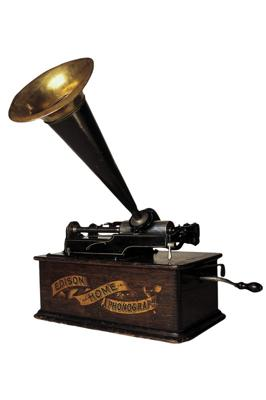

In [21]:
display(imagem)   # mostra inline

In [22]:
print("Formato:", imagem.format, end='\n\n')
print("Modo:", imagem.mode, end='\n\n')
print("Largura x Altura:", imagem.size, end='\n\n')
print("Metadados adicionais:", imagem.info, end='\n\n')

Formato: JPEG

Modo: RGB

Largura x Altura: (266, 400)

Metadados adicionais: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}



- `.save(output_path)` salva a imagem no caminho especificado.
- Alterar extensão no nome do arquivo converte o formato automaticamente.

In [23]:
imagem.save('PIL_output/image_save.png')  # Salva como PNG
im_aux = Image.open('PIL_output/image_save.png')
print("Novo formato:", im_aux.format)

Novo formato: PNG


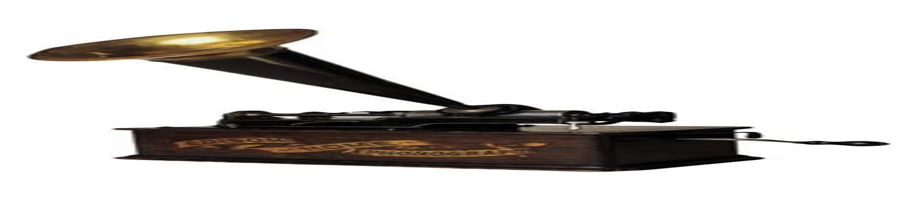

In [24]:
resized = imagem.resize((900, 200))  # Redimensiona para 400x300
display(resized)  


- `.thumbnail((max_width, max_height))` redimensiona mantendo a proporção.
    - Não retorna a nova imagem, aplica o resultado na atual
- A imagem resultante nunca excede as dimensões fornecidas.
- Útil para previews

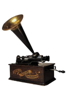

In [25]:
imagem_thumb = imagem.copy()
imagem_thumb.thumbnail((99999, 100))
display(imagem_thumb)

- `.crop((left, top, right, bottom))` retorna uma nova imagem com a região selecionada.

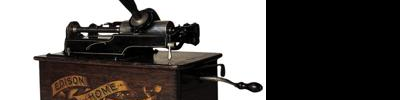

In [26]:
cropped = imagem.crop((0, 200, 400, 300))
display(cropped)

- `.transpose(Image.Transpose.FLIP_LEFT_RIGHT)` espelha horizontalmente.
- `.transpose(Image.Transpose.FLIP_TOP_BOTTOM)` espelha verticalmente.

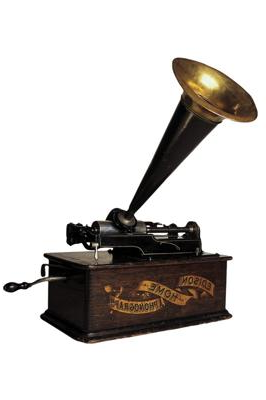

In [27]:
# Espelhamento horizontal
esp_h = imagem.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
display(esp_h)  # Exibe a imagem espelhada horizontalmente

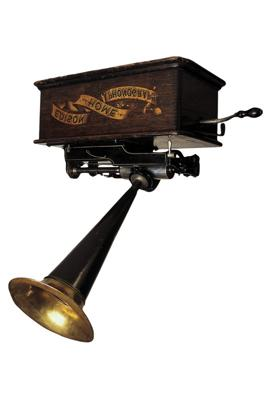

In [28]:
# Espelhamento vertical
esp_v = imagem.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(esp_v)  # Exibe a imagem espelhada verticalmente

- `.rotate(angle)` rotaciona mantendo o tamanho de canvas original

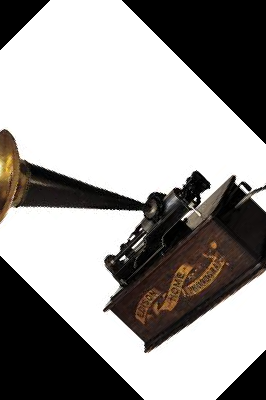

In [29]:
rot = imagem.rotate(45)  # Rotaciona 45 graus no mesmo canvas
display(rot) 

- `.transpose(Image.Transpose.ROTATE_90/180/270)` rotaciona em incrementos de 90° sem manter o canvas

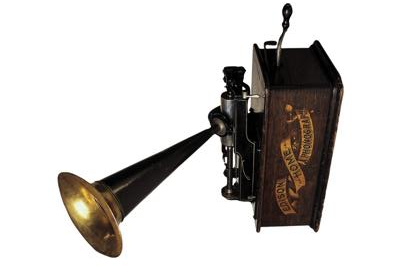

In [30]:
rot90 = imagem.transpose(Image.Transpose.ROTATE_90)
display(rot90)

- `.split()` separa em canais R, G e B.
- `.merge(mode, (chan1, chan2, chan3))` recombina canais em imagem.

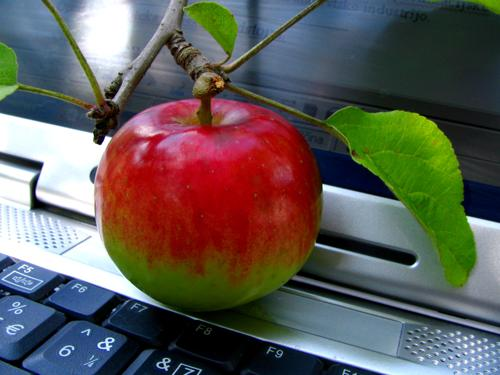

In [31]:
image_rgb = Image.open("maca.jpg")
display(image_rgb)  # Exibe a imagem original

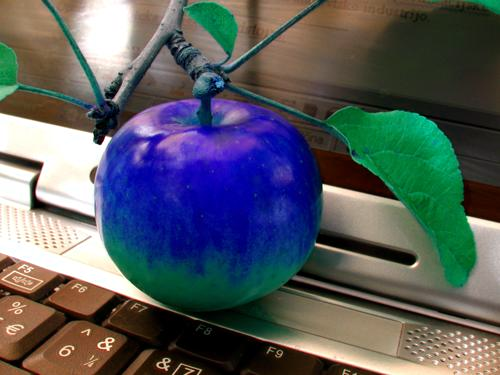

In [32]:
r, g, b = image_rgb.split()  # Cada canal separadamente

# Inverte vermelho e azul
merged = Image.merge("RGB", (b, g, r))
display(merged)  # Exibe a imagem com os canais trocados


- `.paste(source, box)` cola `source` na imagem atual em `box` = (x, y).

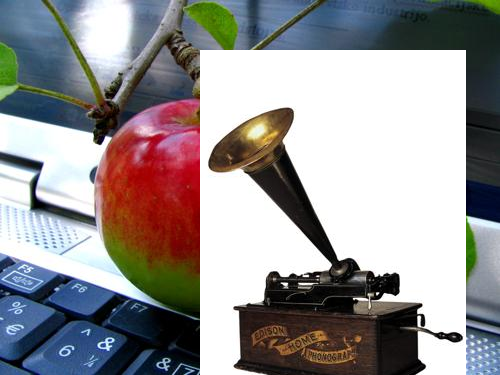

In [33]:
base = Image.open("maca.jpg")
overlay = Image.open("image.jpg")

# Cola no canto superior esquerdo
base.paste(overlay, (200, 50))
display(base) 

- Cria uma máscara em escala de cinza (L) para definir áreas de transparência.
- Regiões brancas (255) mantêm `overlay`, pretas (0) ignoram.

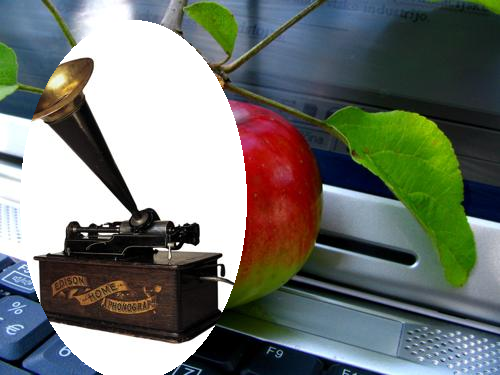

In [34]:
base = Image.open("maca.jpg")
over = Image.open("image.jpg")

# Máscara com uma elipse central
mask = Image.new("L", over.size, 0)
d = ImageDraw.Draw(mask)
w, h = over.size
d.ellipse((20, 20, w-20, h-20), fill=255)

# Cola usando máscara
base.paste(over, (0, 0), mask)
display(base)

- `.filter(ImageFilter.GaussianBlur(radius))` suaviza bordas da máscara.

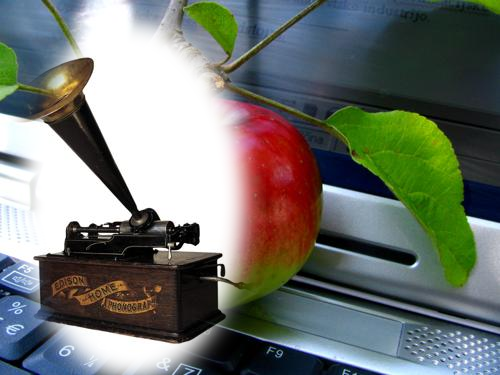

In [35]:
mask_blur = mask.filter(ImageFilter.GaussianBlur(10))

# Cola com máscara suavizada
base = Image.open("maca.jpg")
over = Image.open("image.jpg")
base.paste(over, (0, 0), mask_blur)
display(base) 